In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

# Reflect Database into ORM classes
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Start a session to query the database
session = Session(engine)

In [9]:
# See the first row of the Measurement data to see the columns and values
M_first_row = session.query(Measurement).first()
M_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1b605ba2848>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0}

In [10]:
# See the first row of the Station data to see the columns and values
S_first_row = session.query(Station).first()
S_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1b605bb03c8>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0}

# Exploratory Climate Analysis

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
lastDate= session.query(Measurement.date).order_by(Measurement.date.desc()).first()
lastDate

('2017-08-23')

In [12]:
# Sel only Date and Avg Precipitation 
sel = [Measurement.date, 
       func.avg(Measurement.prcp)
      ]
# Retrive One year worth of Precipitation data based on last date compute in above cell
One_Year_Precipitation = session.query(*sel).\
    filter(
    Measurement.date < "2017-08-23",
    Measurement.date >= "2016-08-23"
).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()

One_Year_Precipitation

[('2016-08-23', 0.45166666666666666),
 ('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 

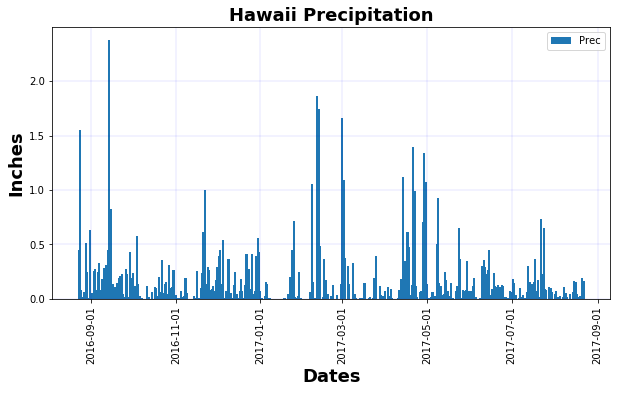

In [17]:
#load the sorted data into the dataframe
df = pd.DataFrame(One_Year_Precipitation, columns=['date', 'prcp'])
df['date']=pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

fig, ax = plt.subplots(figsize=(10,5))


ax.bar(df.index,df.prcp,width=1.5, align='center')

ax.xaxis.set_major_formatter( mdates.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('Dates',fontsize=18,fontweight='bold')
ax.set_ylabel("Inches",fontsize=18,fontweight='bold')
ax.set_title("Hawaii Precipitation",fontsize=18,fontweight='bold')
ax.grid(color='b', linestyle='-', linewidth=.1)
plt.xticks(rotation=90)
ax.legend(['Prec'])

plt.show()



In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,365.000000
mean,0.170862
std,0.296082
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [19]:
# Design a query to show how many stations are available in this dataset?
stations_count = session.query(Station).count()
print(stations_count)

9


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
Combined = session.query(Station.station, Station.name,func.count(Measurement.tobs)).\
           filter(Measurement.station == Station.station).\
           group_by(Station.station, Station.name).\
           order_by(func.count(Measurement.tobs).desc()).all()
Combined



[('USC00519281', 'WAIHEE 837.5, HI US', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 2612),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 511)]

In [21]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [Measurement.station, 
       func.avg(Measurement.tobs),
       func.max(Measurement.tobs),
       func.min(Measurement.tobs)
      ]

Active_Station = session.query(*sel).\
    filter(
    Measurement.station == "USC00519281"
).\
    group_by(Measurement.station).\
    order_by(Measurement.station).all()

Active_Station

[('USC00519281', 71.66378066378067, 85.0, 54.0)]

In [22]:
# Choose the station with the highest number of temperature observations and get the latest date recorded

lastDate_active_Station= session.query(Measurement.date).\
    filter(Measurement.station == "USC00519281").order_by(Measurement.date.desc()).first()

lastDate_active_Station


('2017-08-18')

In [26]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
sel = [Measurement.tobs, 
       func.count(Measurement.tobs)
      ]
# Retrive One year worth of Precipitation data based on last date compute in above cell
One_Year_Temperature = session.query(*sel).\
    filter(
    Measurement.date <= "2017-08-18",
    Measurement.date >= "2016-08-18",
    Measurement.station=="USC00519281"
).\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()

One_Year_Temperature

[(80.0, 1),
 (79.0, 1),
 (81.0, 1),
 (79.0, 1),
 (78.0, 1),
 (77.0, 1),
 (77.0, 1),
 (80.0, 1),
 (80.0, 1),
 (75.0, 1),
 (73.0, 1),
 (78.0, 1),
 (77.0, 1),
 (78.0, 1),
 (80.0, 1),
 (80.0, 1),
 (78.0, 1),
 (78.0, 1),
 (78.0, 1),
 (73.0, 1),
 (74.0, 1),
 (80.0, 1),
 (79.0, 1),
 (77.0, 1),
 (80.0, 1),
 (76.0, 1),
 (79.0, 1),
 (75.0, 1),
 (79.0, 1),
 (78.0, 1),
 (79.0, 1),
 (78.0, 1),
 (78.0, 1),
 (76.0, 1),
 (74.0, 1),
 (77.0, 1),
 (78.0, 1),
 (79.0, 1),
 (79.0, 1),
 (77.0, 1),
 (80.0, 1),
 (78.0, 1),
 (78.0, 1),
 (78.0, 1),
 (77.0, 1),
 (79.0, 1),
 (79.0, 1),
 (79.0, 1),
 (79.0, 1),
 (75.0, 1),
 (76.0, 1),
 (73.0, 1),
 (72.0, 1),
 (71.0, 1),
 (77.0, 1),
 (79.0, 1),
 (78.0, 1),
 (79.0, 1),
 (77.0, 1),
 (79.0, 1),
 (77.0, 1),
 (78.0, 1),
 (78.0, 1),
 (78.0, 1),
 (78.0, 1),
 (77.0, 1),
 (74.0, 1),
 (75.0, 1),
 (76.0, 1),
 (73.0, 1),
 (76.0, 1),
 (74.0, 1),
 (77.0, 1),
 (76.0, 1),
 (76.0, 1),
 (74.0, 1),
 (75.0, 1),
 (75.0, 1),
 (75.0, 1),
 (75.0, 1),
 (71.0, 1),
 (63.0, 1),
 (70.0, 1),
 (68

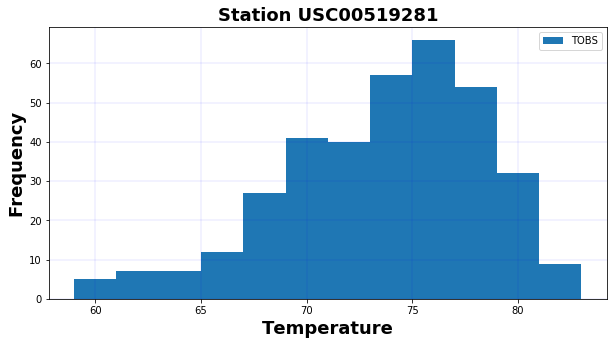

In [27]:
###plot the results as a histogram

df_temp = pd.DataFrame(One_Year_Temperature, columns=['temp', 'Freq'])

df_temp.set_index('temp', inplace=True)
df_temp.head()


fig, ax = plt.subplots(figsize=(10,5))

matplotlib.pyplot.hist(df_temp.index, bins=12)


ax.set_xlabel('Temperature',fontsize=18,fontweight='bold')
ax.set_ylabel("Frequency",fontsize=18,fontweight='bold')
ax.set_title("Station USC00519281",fontsize=18,fontweight='bold')
ax.grid(color='b', linestyle='-', linewidth=.1)


ax.legend(['TOBS'])

plt.show()



## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
